# Сравнительный анализ по визитам заходов на сайт с яндекса и других поисковых систем, их доли

## Период: с 01.01.2023г. по 25.10.2023г.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"..\data\График_для_www.pan-stp.com-Рекламные_системы.csv")
df

,Период,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам,empty
0,2023-01-01,4,1,0,0,NaN
1,2023-01-02,1,0,0,0,NaN
2,2023-01-03,52,20,1,0,NaN
3,2023-01-04,163,33,3,0,NaN
4,2023-01-05,120,39,1,0,NaN
...,...,...,...,...,...,...
293,2023-10-21,42,0,0,0,NaN
294,2023-10-22,31,0,0,0,NaN
295,2023-10-23,63,0,3,0,NaN
296,2023-10-24,67,0,0,0,NaN


In [3]:
import numpy as np

In [4]:
df.drop('empty',axis=1,inplace=True )

In [5]:
df

,Период,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
0,2023-01-01,4,1,0,0
1,2023-01-02,1,0,0,0
2,2023-01-03,52,20,1,0
3,2023-01-04,163,33,3,0
4,2023-01-05,120,39,1,0
...,...,...,...,...,...
293,2023-10-21,42,0,0,0
294,2023-10-22,31,0,0,0
295,2023-10-23,63,0,3,0
296,2023-10-24,67,0,0,0


In [6]:
df["Период"] = pd.to_datetime(df["Период"])

In [7]:
df.dtypes

Период                                  datetime64[ns]
Яндекс: Директ                                   int64
Google Ads                                       int64
Яндекс.Директ: Не определено                     int64
Другая реклама: определено по меткам             int64
dtype: object

In [8]:
df.index = df["Период"]
df.drop(["Период"], axis=1, inplace=True)

In [9]:
df

,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
Период,,,,
2023-01-01,4,1,0,0
2023-01-02,1,0,0,0
2023-01-03,52,20,1,0
2023-01-04,163,33,3,0
2023-01-05,120,39,1,0
...,...,...,...,...
2023-10-21,42,0,0,0
2023-10-22,31,0,0,0
2023-10-23,63,0,3,0


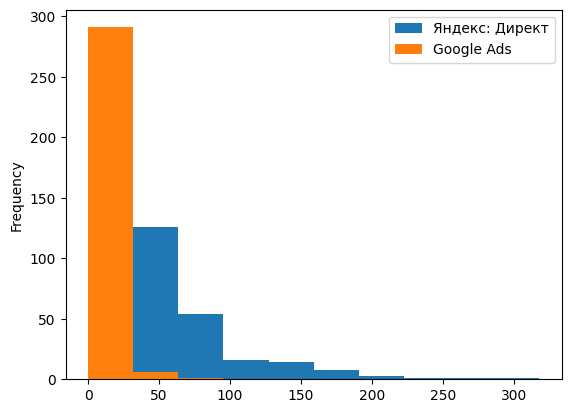

In [10]:
df.plot.hist(column=['Яндекс: Директ','Google Ads']);

In [11]:
df.agg(['mean'])

,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
mean,58.647651,1.624161,0.520134,0.083893


In [12]:
df_sum = df.agg(['sum'])
df_sum

,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
sum,17477,484,155,25


In [13]:
df.agg({'Яндекс: Директ':'sum', 'Google Ads': 'mean'}) ##просто пример

Яндекс: Директ    17477.000000
Google Ads            1.624161
dtype: float64

In [14]:
df_sum.iloc[:,-3:]

,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
sum,484,155,25


In [15]:
df_sum.iloc[:,-3:].sum(axis=1)

sum    664
dtype: int64

In [16]:
df_sum.iloc[:,-3:].sum(axis=1)['sum']

664

In [17]:
df_sum['остальные'] = df_sum.iloc[:,-3:].sum(axis=1)['sum']
df_sum

,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам,остальные
sum,17477,484,155,25,664


In [18]:
df_sum.T

,sum
Яндекс: Директ,17477
Google Ads,484
Яндекс.Директ: Не определено,155
Другая реклама: определено по меткам,25
остальные,664


<Axes: >

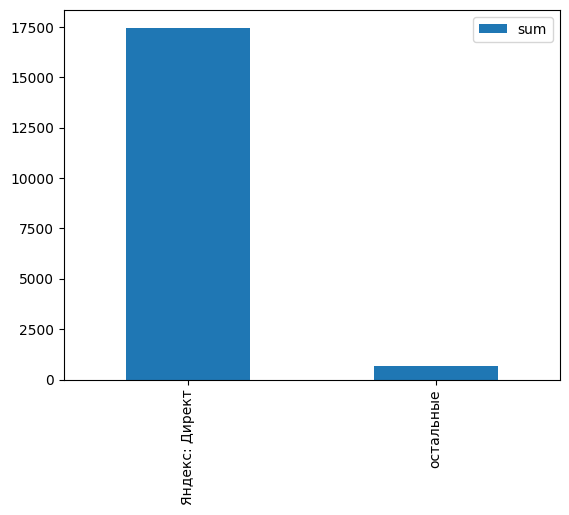

In [19]:
df_sum.T.iloc[[0,-1]].plot.bar(y='sum')

<Axes: >

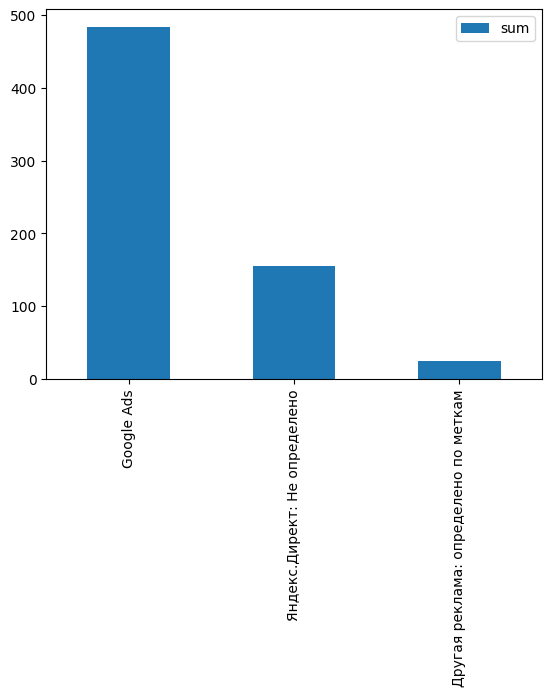

In [20]:
df_sum.T.iloc[1:-1].plot.bar(y='sum')

In [21]:
df_sum.columns

Index(['Яндекс: Директ', 'Google Ads', 'Яндекс.Директ: Не определено',
       'Другая реклама: определено по меткам', 'остальные'],
      dtype='object')

In [22]:
total_1 = df_sum[['Яндекс: Директ','остальные' ]].sum(axis=1)['sum']
total_1

18141

In [23]:
df_sum

,Яндекс: Директ,Google Ads,Яндекс.Директ: Не определено,Другая реклама: определено по меткам,остальные
sum,17477,484,155,25,664


In [24]:
import matplotlib.pyplot as plt

In [25]:
count = df_sum.T.iloc[[0,-1],...]
count

,sum
Яндекс: Директ,17477
остальные,664


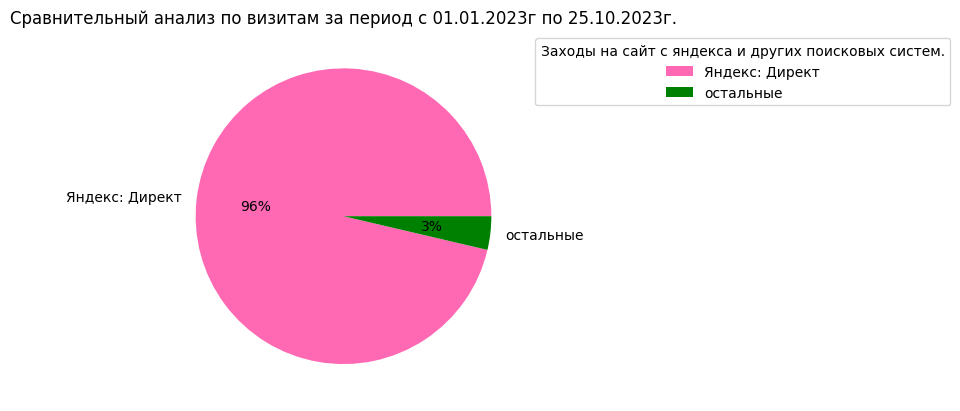

In [26]:
mycolors = ["hotpink","green"]
plt.pie(count['sum'], autopct=lambda x:f'{int(x)}%', labels=count.index, colors =  mycolors)
plt.title('Сравнительный анализ по визитам за период с 01.01.2023г по 25.10.2023г.')
plt.legend(title = 'Заходы на сайт с яндекса и других поисковых систем.', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт с яндекса и др.поисковых систем, их доли.jpg') 
plt.show()

###  Заходы без Яндекса доли между остальными

In [27]:
df_sum.columns

Index(['Яндекс: Директ', 'Google Ads', 'Яндекс.Директ: Не определено',
       'Другая реклама: определено по меткам', 'остальные'],
      dtype='object')

In [28]:
count_g= df_sum.T.iloc[[1,-1],...]
count_g

,sum
Google Ads,484
остальные,664


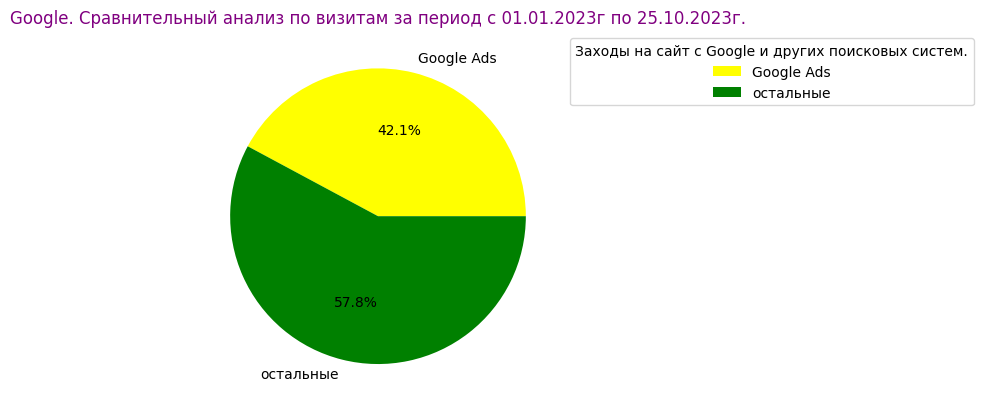

In [29]:
mycolors = ["yellow","green"]
plt.pie(count_g['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=count_g.index, colors =  mycolors)
plt.title('Google. Сравнительный анализ по визитам за период с 01.01.2023г по 25.10.2023г.', color = "purple")
plt.legend(title = 'Заходы на сайт с Google и других поисковых систем.', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт с гугла и др.поисковых систем, их доли.jpg') 
plt.show()

In [30]:
count_unknown_y= df_sum.T.iloc[[2,-1],...]
count_unknown_y

,sum
Яндекс.Директ: Не определено,155
остальные,664


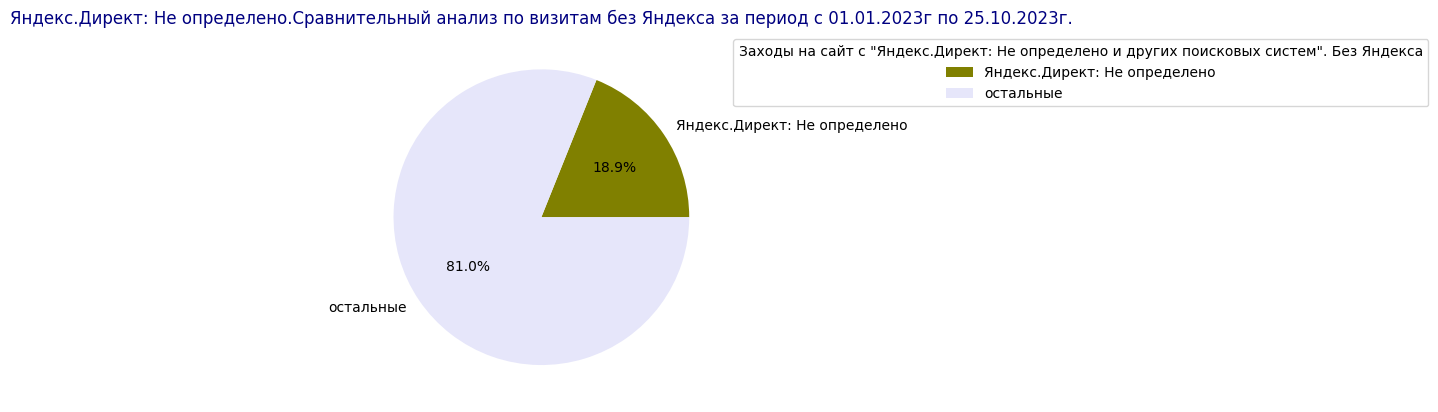

In [31]:
mycolors_y = ['olive', 'lavender']
plt.pie(count_unknown_y['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=count_unknown_y.index, colors =  mycolors_y)
plt.title('Яндекс.Директ: Не определено.' '' '' 'Сравнительный анализ по визитам без Яндекса за период с 01.01.2023г по 25.10.2023г.', color = "navy")
plt.legend(title = 'Заходы на сайт с "Яндекс.Директ: Не определено и других поисковых систем". Без Яндекса', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт споисковых систем без Яндекса.jpg') 
plt.show()

In [32]:
count_other_adds= df_sum.T.iloc[[3,-1],...]
count_other_adds

,sum
Другая реклама: определено по меткам,25
остальные,664


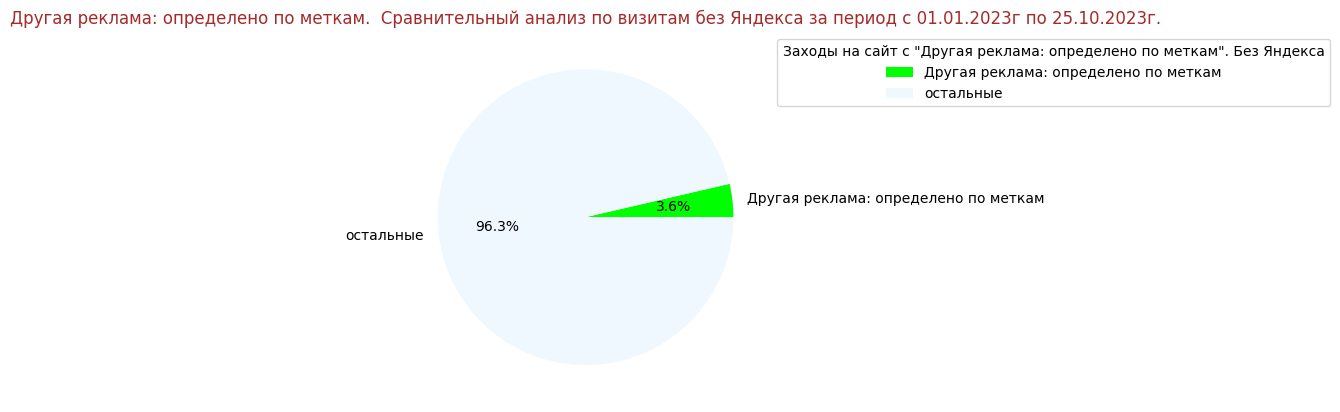

In [33]:
mycolors_o = ['lime', 'aliceblue']
plt.pie(count_other_adds['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=count_other_adds.index, colors =  mycolors_o)
plt.title('Другая реклама: определено по меткам.' ' ' ' ' 'Сравнительный анализ по визитам без Яндекса за период с 01.01.2023г по 25.10.2023г.', color = "brown")
plt.legend(title = 'Заходы на сайт с "Другая реклама: определено по меткам". Без Яндекса', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт c другой рекламы без Яндекса.jpg') 
plt.show()

In [34]:
count_all_others= df_sum.T.iloc[[1,2,3],...]
count_all_others

,sum
Google Ads,484
Яндекс.Директ: Не определено,155
Другая реклама: определено по меткам,25


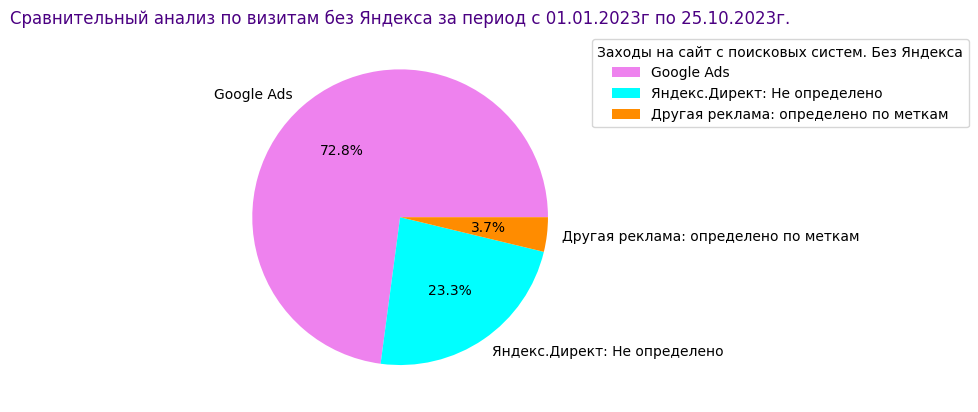

In [35]:
mycolors_ = ['violet', 'aqua', 'darkorange']
plt.pie(count_all_others['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=count_all_others.index, colors =  mycolors_)
plt.title('Сравнительный анализ по визитам без Яндекса за период с 01.01.2023г по 25.10.2023г.', color = "indigo")
plt.legend(title = 'Заходы на сайт с поисковых систем. Без Яндекса', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт споисковых систем без Яндекса.jpg') 
plt.show()

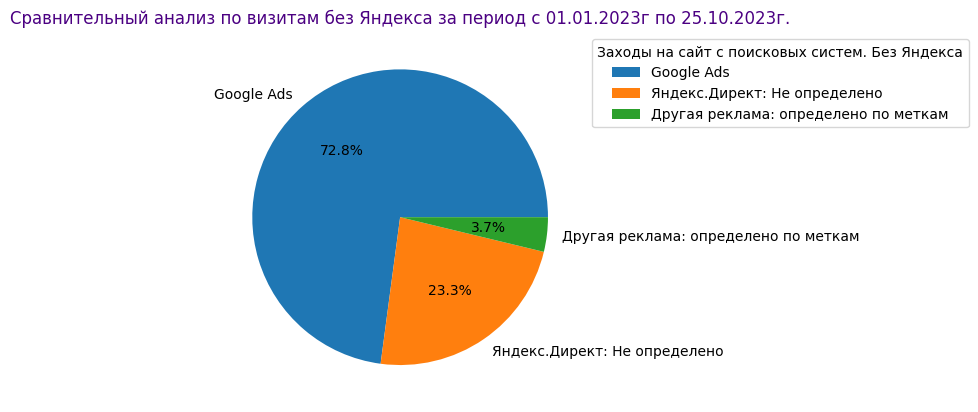

In [36]:
plt.pie(count_all_others['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=count_all_others.index)
plt.title('Сравнительный анализ по визитам без Яндекса за период с 01.01.2023г по 25.10.2023г.', color = "indigo")
plt.legend(title = 'Заходы на сайт с поисковых систем. Без Яндекса', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Заходы на сайт споисковых систем без Яндекса.jpg') 
plt.show()

## Рекламные_системы_анализ_ c _2020г

In [37]:
df_20 = pd.read_csv(r"..\data\График_для_www.pan-stp.com-Рекламные_системы_анализ_ c _2020г.csv")
df_20

,Период,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам,nothing
0,2020-01-01,83,0,0,0,NaN
1,2020-01-02,104,0,0,0,NaN
2,2020-01-03,98,0,0,0,NaN
3,2020-01-04,68,0,0,0,NaN
4,2020-01-05,67,0,0,0,NaN
...,...,...,...,...,...,...
1389,2023-10-21,0,40,0,0,NaN
1390,2023-10-22,0,31,0,0,NaN
1391,2023-10-23,0,57,2,0,NaN
1392,2023-10-24,0,60,0,0,NaN


In [38]:
df_20.drop('nothing',axis=1,inplace=True )

In [39]:
df_20

,Период,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
0,2020-01-01,83,0,0,0
1,2020-01-02,104,0,0,0
2,2020-01-03,98,0,0,0
3,2020-01-04,68,0,0,0
4,2020-01-05,67,0,0,0
...,...,...,...,...,...
1389,2023-10-21,0,40,0,0
1390,2023-10-22,0,31,0,0
1391,2023-10-23,0,57,2,0
1392,2023-10-24,0,60,0,0


In [40]:
df_20["Период"] = pd.to_datetime(df_20["Период"])
df_20.dtypes

Период                                  datetime64[ns]
Google Ads                                       int64
Яндекс: Директ                                   int64
Яндекс.Директ: Не определено                     int64
Другая реклама: определено по меткам             int64
dtype: object

In [41]:
df_20

,Период,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
0,2020-01-01,83,0,0,0
1,2020-01-02,104,0,0,0
2,2020-01-03,98,0,0,0
3,2020-01-04,68,0,0,0
4,2020-01-05,67,0,0,0
...,...,...,...,...,...
1389,2023-10-21,0,40,0,0
1390,2023-10-22,0,31,0,0
1391,2023-10-23,0,57,2,0
1392,2023-10-24,0,60,0,0


In [42]:
df_20.index = df_20["Период"]
df_20.drop(["Период"], axis=1, inplace=True)

In [43]:
df_20

,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
Период,,,,
2020-01-01,83,0,0,0
2020-01-02,104,0,0,0
2020-01-03,98,0,0,0
2020-01-04,68,0,0,0
2020-01-05,67,0,0,0
...,...,...,...,...
2023-10-21,0,40,0,0
2023-10-22,0,31,0,0
2023-10-23,0,57,2,0


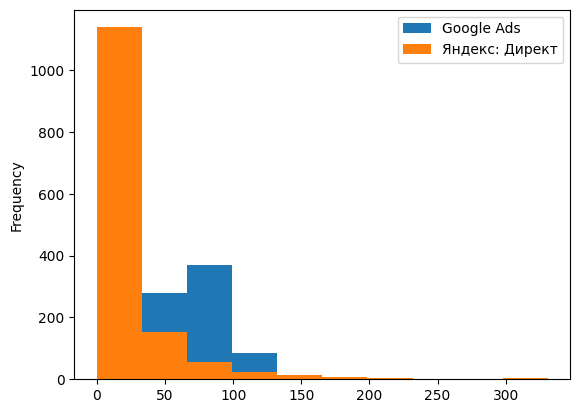

In [44]:
df_20.plot.hist(column=['Google Ads','Яндекс: Директ']);

In [45]:
df_20.agg(['mean'])

,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
mean,40.715208,15.230273,0.167145,0.018651


In [46]:
df_20_sum = df_20.agg(['sum'])
df_20_sum

,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
sum,56757,21231,233,26


In [47]:
df_20_sum.T

,sum
Google Ads,56757
Яндекс: Директ,21231
Яндекс.Директ: Не определено,233
Другая реклама: определено по меткам,26


In [48]:
df_20_sum.iloc[:,-2:]

,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
sum,233,26


In [49]:
df_20_sum['остальные'] = df_20_sum.iloc[:,-2:].sum(axis=1)['sum']
df_20_sum

,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам,остальные
sum,56757,21231,233,26,259


In [50]:
count_all_2020 = df_20_sum.T.iloc[[0,1],...]
count_all_2020

,sum
Google Ads,56757
Яндекс: Директ,21231


In [51]:
df_20_sum.T

,sum
Google Ads,56757
Яндекс: Директ,21231
Яндекс.Директ: Не определено,233
Другая реклама: определено по меткам,26
остальные,259


In [52]:
import seaborn as sns

<Axes: ylabel='Count'>

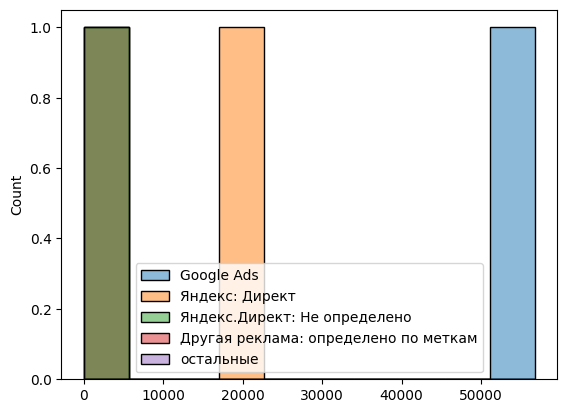

In [53]:
sns.histplot(df_20_sum, bins=10)

In [54]:
df_20_new = pd.DataFrame(df_20)
df_20_new

,Google Ads,Яндекс: Директ,Яндекс.Директ: Не определено,Другая реклама: определено по меткам
Период,,,,
2020-01-01,83,0,0,0
2020-01-02,104,0,0,0
2020-01-03,98,0,0,0
2020-01-04,68,0,0,0
2020-01-05,67,0,0,0
...,...,...,...,...
2023-10-21,0,40,0,0
2023-10-22,0,31,0,0
2023-10-23,0,57,2,0


In [55]:
count_all_2020.values

array([[56757],
       [21231]], dtype=int64)

In [56]:
count_all_2020

,sum
Google Ads,56757
Яндекс: Директ,21231


In [57]:
df_20_sum.T

,sum
Google Ads,56757
Яндекс: Директ,21231
Яндекс.Директ: Не определено,233
Другая реклама: определено по меткам,26
остальные,259


In [58]:
df_20_sum_3adds = df_20_sum.T.iloc[[0,1,4],...]
df_20_sum_3adds

,sum
Google Ads,56757
Яндекс: Директ,21231
остальные,259


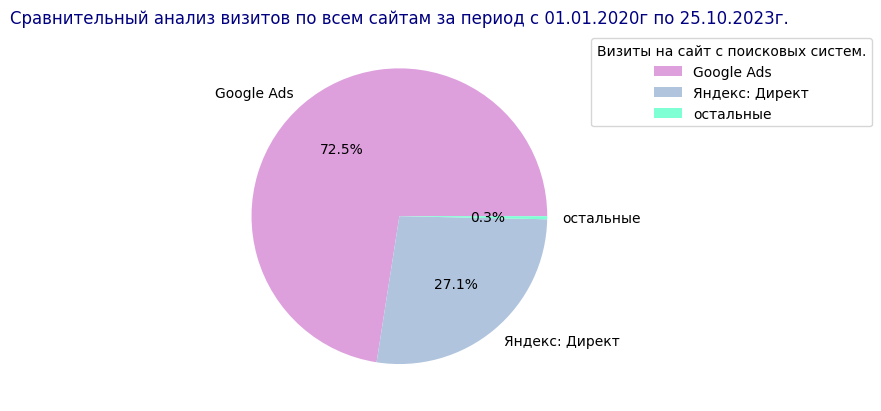

In [59]:
mycolors_ = ['plum', 'lightsteelblue', 'aquamarine']
plt.pie(df_20_sum_3adds['sum'], autopct=lambda x:f'{int(x*10)/10}%', labels=df_20_sum_3adds.index, colors =  mycolors_)
plt.title('Сравнительный анализ визитов по всем сайтам за период с 01.01.2020г по 25.10.2023г.', color = "")
plt.legend(title = 'Визиты на сайт с поисковых систем.', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.savefig('Визиты на сайт с поисковых систем за период с 01.01.2020г по 25.10.2023г.jpg') 
plt.show()